# Pandemic taxis



In [1]:
!ls 

'PyRVA - PyRVA-2021-11Nov-10.ipynb'   nyc_taxi_2020-01.csv
 nyc_taxi_2019-01.csv		      nyc_taxi_2020-07.csv
 nyc_taxi_2019-07.csv


In [3]:
!ls -lh

total 1.9G
-rw-r--r-- 1 reuven staff  565 Nov 11 01:38 'PyRVA - PyRVA-2021-11Nov-10.ipynb'
-rw-r--r-- 1 reuven staff 656M Nov 11 01:23  nyc_taxi_2019-01.csv
-rw-r--r-- 1 reuven staff 558M Nov 11 01:23  nyc_taxi_2019-07.csv
-rw-r--r-- 1 reuven staff 567M Nov 11 01:23  nyc_taxi_2020-01.csv
-rw-r--r-- 1 reuven staff  70M Nov 11 01:23  nyc_taxi_2020-07.csv


In [4]:
import pandas as pd
from pandas import Series, DataFrame

In [5]:
# load the data from July 2019 into a data frame
df_0719 = pd.read_csv('nyc_taxi_2019-07.csv')

/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df_0719.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2019-07-01 00:51:04,2019-07-01 00:51:33,1.0,0.00,1.0,N,193,193,1.0,2.5,0.5,0.5,1.14,0.00,0.3,4.94,0.0
1,2.0,2019-07-01 00:46:04,2019-07-01 01:05:46,1.0,4.16,1.0,N,234,25,2.0,16.5,0.5,0.5,0.00,0.00,0.3,20.30,2.5
2,1.0,2019-07-01 00:25:09,2019-07-01 01:00:56,1.0,18.80,2.0,N,132,42,1.0,52.0,0.0,0.5,11.75,6.12,0.3,70.67,0.0
3,2.0,2019-07-01 00:33:32,2019-07-01 01:15:27,1.0,18.46,2.0,N,132,142,1.0,52.0,0.0,0.5,11.06,0.00,0.3,66.36,2.5
4,1.0,2019-07-01 00:00:55,2019-07-01 00:13:05,0.0,1.70,1.0,N,107,114,1.0,9.5,3.0,0.5,2.00,0.00,0.3,15.30,2.5


In [8]:
df_0719.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [12]:
# load the data from July 2019 into a data frame
import time

start_time = time.perf_counter()
df_0719 = pd.read_csv('nyc_taxi_2019-07.csv', low_memory=False)
end_time = time.perf_counter()

print(f'Took {end_time - start_time} seconds')

Took 12.170629035914317 seconds


In [11]:
df_0719.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [13]:
from numpy import float64, int64

taxi_dtypes = {'VendorID':float64,
'tpep_pickup_datetime':object,
'tpep_dropoff_datetime':object,
'passenger_count':float64,
'trip_distance':float64,
'RatecodeID':float64,
'store_and_fwd_flag':object,
'PULocationID':int64,
'DOLocationID':int64,
'payment_type':float64,
'fare_amount':float64,
'extra':float64,
'mta_tax':float64,
'tip_amount':float64,
'tolls_amount':float64,
'improvement_surcharge':float64,
'total_amount':float64,
'congestion_surcharge':float64}


In [15]:
start_time = time.perf_counter()
df_0719 = pd.read_csv('nyc_taxi_2019-07.csv', dtype=taxi_dtypes)
end_time = time.perf_counter()

print(f'Took {end_time - start_time} seconds')

Took 7.91425155592151 seconds


In [18]:
start_time = time.perf_counter()
df_0719 = pd.read_csv('nyc_taxi_2019-07.csv', dtype=taxi_dtypes,
                     usecols=['passenger_count', 'total_amount', 'payment_type', 'trip_distance'])
end_time = time.perf_counter()

print(f'Took {end_time - start_time} seconds')

Took 3.0287601659074426 seconds


In [19]:
df_0719.head()

,passenger_count,trip_distance,payment_type,total_amount
0,1.0,0.00,1.0,4.94
1,1.0,4.16,2.0,20.30
2,1.0,18.80,1.0,70.67
3,1.0,18.46,1.0,66.36
4,0.0,1.70,1.0,15.30


In [20]:
df_0719['passenger_count'].mean()

1.5720450699916833

In [21]:
df_0719['passenger_count'].value_counts()

1.0    4380890
2.0     953756
3.0     279181
5.0     254262
6.0     151710
4.0     139710
0.0     116884
7.0         29
8.0         22
9.0         16
Name: passenger_count, dtype: int64

In [22]:
df_0719['passenger_count'].value_counts(normalize=True)

1.0    0.697987
2.0    0.151958
3.0    0.044481
5.0    0.040510
6.0    0.024171
4.0    0.022259
0.0    0.018623
7.0    0.000005
8.0    0.000004
9.0    0.000003
Name: passenger_count, dtype: float64

In [28]:
pd.set_option('float_format', '{:f}'.format)
df_0719['trip_distance'].describe()

count   6310419.000000
mean          3.110132
std           4.065832
min           0.000000
25%           1.000000
50%           1.680000
75%           3.190000
max         311.560000
Name: trip_distance, dtype: float64

In [27]:
df_0719['payment_type'].value_counts(normalize=True)

1.0    0.704883
2.0    0.287060
3.0    0.005654
4.0    0.002404
Name: payment_type, dtype: float64

In [29]:
start_time = time.perf_counter()
df_0720 = pd.read_csv('nyc_taxi_2020-07.csv', dtype=taxi_dtypes,
                     usecols=['passenger_count', 'total_amount', 'payment_type', 'trip_distance'])
end_time = time.perf_counter()

print(f'Took {end_time - start_time} seconds')

Took 0.4088723650202155 seconds


In [31]:
df_0720['passenger_count'].value_counts(normalize=True)

1.000000   0.767402
2.000000   0.123243
3.000000   0.029527
0.000000   0.026446
5.000000   0.023194
6.000000   0.019587
4.000000   0.010589
7.000000   0.000007
8.000000   0.000003
9.000000   0.000001
Name: passenger_count, dtype: float64

In [32]:
df_0720['payment_type'].value_counts(normalize=True)

1.000000   0.665705
2.000000   0.320559
3.000000   0.009245
4.000000   0.004490
Name: payment_type, dtype: float64

In [33]:
df_0719.head()

,passenger_count,trip_distance,payment_type,total_amount
0,1.000000,0.000000,1.000000,4.940000
1,1.000000,4.160000,2.000000,20.300000
2,1.000000,18.800000,1.000000,70.670000
3,1.000000,18.460000,1.000000,66.360000
4,0.000000,1.700000,1.000000,15.300000


In [34]:
# not a good idea! don't do this!
df_0719.head() + df_0720.head()

,passenger_count,trip_distance,payment_type,total_amount
0,2.000000,1.500000,3.000000,14.240000
1,2.000000,13.660000,3.000000,48.100000
2,2.000000,24.650000,3.000000,92.970000
3,2.000000,20.360000,2.000000,80.520000
4,1.000000,2.950000,3.000000,23.100000


In [35]:
# add a column to each of these data frames, indicating the year of the data frame
df_0719['year'] = 2019
df_0720['year'] = 2020

In [36]:
df_0719.head()

,passenger_count,trip_distance,payment_type,total_amount,year
0,1.000000,0.000000,1.000000,4.940000,2019
1,1.000000,4.160000,2.000000,20.300000,2019
2,1.000000,18.800000,1.000000,70.670000,2019
3,1.000000,18.460000,1.000000,66.360000,2019
4,0.000000,1.700000,1.000000,15.300000,2019


In [37]:
df_0720.head()

,passenger_count,trip_distance,payment_type,total_amount,year
0,1.000000,1.500000,2.000000,9.300000,2020
1,1.000000,9.500000,1.000000,27.800000,2020
2,1.000000,5.850000,2.000000,22.300000,2020
3,1.000000,1.900000,1.000000,14.160000,2020
4,1.000000,1.250000,2.000000,7.800000,2020


In [38]:
# not a good idea! don't do this!
df_0719.head() + df_0720.head()

,passenger_count,trip_distance,payment_type,total_amount,year
0,2.000000,1.500000,3.000000,14.240000,4039
1,2.000000,13.660000,3.000000,48.100000,4039
2,2.000000,24.650000,3.000000,92.970000,4039
3,2.000000,20.360000,2.000000,80.520000,4039
4,1.000000,2.950000,3.000000,23.100000,4039


In [39]:
df = pd.concat([df_0719, df_0720])

In [40]:
df.shape

(7110831, 5)

In [41]:
df['passenger_count'].mean()

1.551682236661546

In [42]:
# what is the mean passenger count for each year?
df.groupby('year')

In [43]:
df.groupby('year').mean()

,passenger_count,trip_distance,payment_type,total_amount
year,,,,
2019,1.572045,3.110132,1.305580,19.612299
2020,1.378401,4.304165,1.352521,18.631460


In [45]:
df.groupby('year')['passenger_count'].count()

year
2019    6276460
2020     737565
Name: passenger_count, dtype: int64

In [46]:
df['trip_distance'].describe()

count   7110831.000000
mean          3.244535
std         158.977360
min           0.000000
25%           1.000000
50%           1.700000
75%           3.200000
max      256069.130000
Name: trip_distance, dtype: float64

In [47]:
df.groupby('year')['trip_distance'].min()

year
2019   0.000000
2020   0.000000
Name: trip_distance, dtype: float64

In [48]:
df.groupby('year')['trip_distance'].max()

year
2019      311.560000
2020   256069.130000
Name: trip_distance, dtype: float64

In [53]:
df.groupby('year')['trip_distance'].agg(['min', 'max', 'mean', 'median', 'std'])

,min,max,mean,median,std
year,,,,,
2019,0.000000,311.560000,3.110132,1.680000,4.065832
2020,0.000000,256069.130000,4.304165,1.790000,473.708961


In [55]:
# what proprtion of people paid with credit cards in 2019?

df.loc[df['year'] == 2019, 'payment_type'].value_counts()

1.000000    4424167
2.000000    1801718
3.000000      35485
4.000000      15090
Name: payment_type, dtype: int64

In [56]:
df_0719['payment_type'].value_counts(normalize=True)

1.000000   0.704883
2.000000   0.287060
3.000000   0.005654
4.000000   0.002404
Name: payment_type, dtype: float64

In [57]:
df_0720['payment_type'].value_counts(normalize=True)

1.000000   0.665705
2.000000   0.320559
3.000000   0.009245
4.000000   0.004490
Name: payment_type, dtype: float64

In [60]:
(df['trip_distance'] > 2500).value_counts()

False    7110823
True           8
Name: trip_distance, dtype: int64

In [61]:
(df['trip_distance'] > 500).value_counts()

False    7110822
True           9
Name: trip_distance, dtype: int64

In [62]:
(df['trip_distance'] > 100).value_counts()

False    7110768
True          63
Name: trip_distance, dtype: int64

In [67]:
df_0719 = pd.read_csv('nyc_taxi_2019-07.csv', dtype=taxi_dtypes,
                     usecols=['passenger_count', 'total_amount', 'payment_type', 'trip_distance', 'tip_amount'])
df_0719['year'] = 2019

df_0720 = pd.read_csv('nyc_taxi_2020-07.csv', dtype=taxi_dtypes,
                     usecols=['passenger_count', 'total_amount', 'payment_type', 'trip_distance', 'tip_amount'])
df_0720['year'] = 2020

df = pd.concat([df_0719, df_0720])

In [68]:
# what proportion of the total amount was a tip?
df['tip_percentage']  = df['tip_amount'] / df['total_amount']

In [69]:
# did people tip more (as a percentage) in 2019 or 2020?

df.groupby('year')['tip_percentage'].mean()

year
2019   0.104359
2020   0.096688
Name: tip_percentage, dtype: float64

In [72]:
# only show me rows where the total amount < 0
df[df['total_amount'] < 0].count()

passenger_count    16954
trip_distance      16984
payment_type       16954
tip_amount         16984
total_amount       16984
year               16984
tip_percentage     16984
dtype: int64

In [82]:
# get rid of amounts < 0
df = df[~(df['total_amount'] < 0)]

In [83]:
# get rid of distances > 500 miles
df = df[~(df['trip_distance'] > 500)]

In [85]:
df['trip_distance'].describe()

count   7093838.000000
mean          3.117325
std           4.067452
min           0.000000
25%           1.000000
50%           1.700000
75%           3.200000
max         414.400000
Name: trip_distance, dtype: float64

In [87]:
!head nyc_taxi_2019-01.csv

In [91]:



df_0719 = pd.read_csv('nyc_taxi_2019-07.csv', dtype=taxi_dtypes,
                     usecols=['passenger_count', 'total_amount', 'payment_type', 'trip_distance', 'tip_amount',
                             'tpep_pickup_datetime', 'tpep_dropoff_datetime'],
                     parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
df_0719['year'] = 2019

df_0720 = pd.read_csv('nyc_taxi_2020-07.csv', dtype=taxi_dtypes,
                     usecols=['passenger_count', 'total_amount', 'payment_type', 'trip_distance', 'tip_amount',
                             'tpep_pickup_datetime', 'tpep_dropoff_datetime'],
                     parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
df_0720['year'] = 2020

df = pd.concat([df_0719, df_0720])

In [92]:
df.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
payment_type                    float64
tip_amount                      float64
total_amount                    float64
year                              int64
dtype: object

In [93]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,tip_amount,total_amount,year
0,2019-07-01 00:51:04,2019-07-01 00:51:33,1.000000,0.000000,1.000000,1.140000,4.940000,2019
1,2019-07-01 00:46:04,2019-07-01 01:05:46,1.000000,4.160000,2.000000,0.000000,20.300000,2019
2,2019-07-01 00:25:09,2019-07-01 01:00:56,1.000000,18.800000,1.000000,11.750000,70.670000,2019
3,2019-07-01 00:33:32,2019-07-01 01:15:27,1.000000,18.460000,1.000000,11.060000,66.360000,2019
4,2019-07-01 00:00:55,2019-07-01 00:13:05,0.000000,1.700000,1.000000,2.000000,15.300000,2019


In [98]:
df[df['tpep_pickup_datetime'].dt.hour == 8].groupby('year').count() 

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,tip_amount,total_amount
year,,,,,,,
2019,286436,286436,284185,286436,284185,286436,286436
2020,35090,35090,32890,35090,32890,35090,35090


In [99]:
df.groupby('year').count()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,tip_amount,total_amount
year,,,,,,,
2019,6310419,6310419,6276460,6310419,6276460,6310419,6310419
2020,800412,800412,737565,800412,737565,800412,800412


In [101]:
df[df['tpep_pickup_datetime'].dt.hour == 8].groupby('year')['tpep_pickup_datetime'].count() / df.groupby('year')['tpep_pickup_datetime'].count()

year
2019   0.045391
2020   0.043840
Name: tpep_pickup_datetime, dtype: float64

In [103]:
df[df['tpep_pickup_datetime'].dt.hour.isin([6,7,8,9])].groupby('year')['tpep_pickup_datetime'].count() / df.groupby('year')['tpep_pickup_datetime'].count()

year
2019   0.149311
2020   0.150600
Name: tpep_pickup_datetime, dtype: float64

In [107]:
df_0719['tpep_pickup_datetime'].dt.hour.value_counts(normalize=True).sort_index()

0    0.029166
1    0.019930
2    0.013908
3    0.009289
4    0.007437
5    0.009549
6    0.022147
7    0.034620
8    0.045391
9    0.047154
10   0.047243
11   0.049664
12   0.053106
13   0.054318
14   0.056736
15   0.056191
16   0.052728
17   0.058393
18   0.065198
19   0.062516
20   0.056528
21   0.056248
22   0.051417
23   0.041124
Name: tpep_pickup_datetime, dtype: float64

In [108]:
df_0720['tpep_pickup_datetime'].dt.hour.value_counts(normalize=True).sort_index()

0    0.014314
1    0.011970
2    0.009047
3    0.008942
4    0.009213
5    0.008504
6    0.023181
7    0.032345
8    0.043840
9    0.051235
10   0.057823
11   0.062275
12   0.068169
13   0.071938
14   0.073803
15   0.073974
16   0.071393
17   0.070799
18   0.066377
19   0.053063
20   0.038292
21   0.030812
22   0.025965
23   0.022728
Name: tpep_pickup_datetime, dtype: float64

In [109]:
DataFrame({2019: df_0719['tpep_pickup_datetime'].dt.hour.value_counts(normalize=True).sort_index(),
          2020: df_0720['tpep_pickup_datetime'].dt.hour.value_counts(normalize=True).sort_index()})

,2019,2020
0,0.029166,0.014314
1,0.019930,0.011970
2,0.013908,0.009047
3,0.009289,0.008942
4,0.007437,0.009213
5,0.009549,0.008504
6,0.022147,0.023181
7,0.034620,0.032345
8,0.045391,0.043840
9,0.047154,0.051235


<AxesSubplot:>

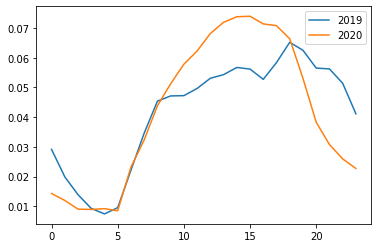

In [110]:
DataFrame({2019: df_0719['tpep_pickup_datetime'].dt.hour.value_counts(normalize=True).sort_index(),
          2020: df_0720['tpep_pickup_datetime'].dt.hour.value_counts(normalize=True).sort_index()}).plot.line()